In [2]:
import os
os.chdir('/Users/federicogalbiati/Documents/GitHub/User-Study-Game-Performance-Analysis-ISU/')

In [3]:
import pandas as pd

data = pd.read_csv('data/processed/hw-study/G6/metrics_03-19-22_22-09-37.csv')
data = data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'game_params', 'init_time', 'total_time', 'times', 'iteration'])
data['total'] = data['load'] + data['level']
data = data.drop(columns=['load', 'level'])
print(data)

    game_name       total
0        GTA5   97.914102
1        GTA5   97.980601
2        GTA5   98.696368
3        GTA5  100.037641
4        GTA5   97.817228
..        ...         ...
115       LoL   40.922091
116       LoL   40.908861
117       LoL   40.900988
118       LoL   40.813934
119       LoL   40.970747

[120 rows x 2 columns]


In [4]:
import numpy as np

df = data.groupby(['game_name'])

vals, names, xs = [],[],[]

for i, x in enumerate(df):
    vals.append(x[1]['total'].values)
    names.append(x[0])
    xs.append(np.random.normal(i + 1, 0.04, x[1]['total'].values.shape[0]))  

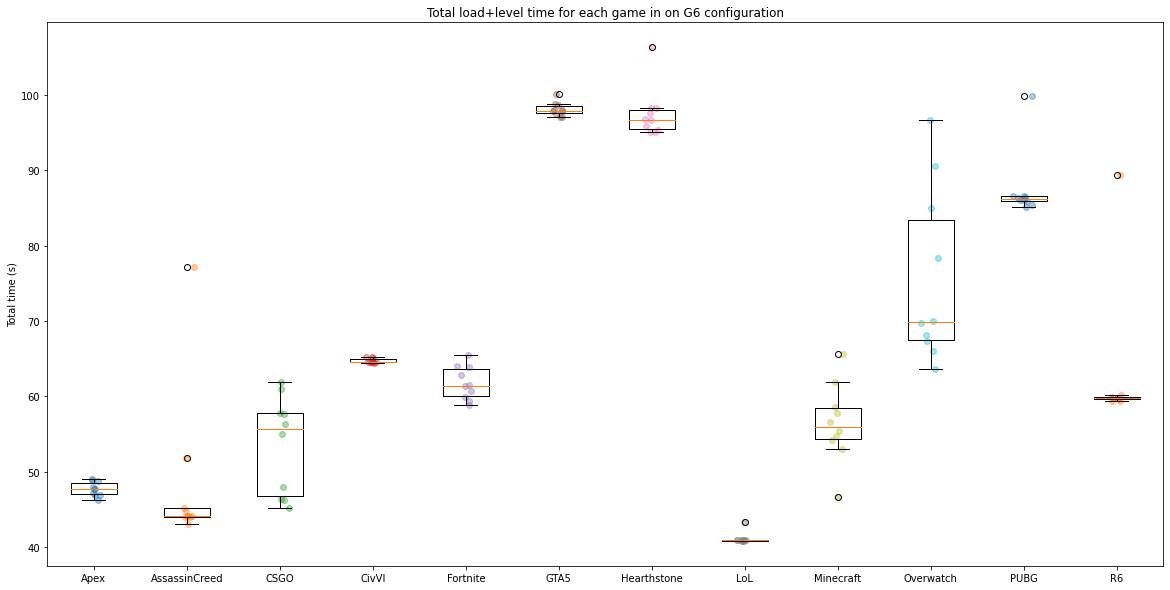

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.boxplot(vals, labels=names)
for x, val in zip(xs, vals):
    plt.scatter(x, val, alpha=0.4)

plt.title('Total load+level time for each game in on G6 configuration')
plt.ylabel('Total time (s)')
plt.show()
